In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats

**The significance threshold is 95%, so the p value is 0.05**

# Data gathering
Get a single month of data:  reading data from citibike csv file from May 2019



read a csv file with pandas so that the content is stored in a "DataFrame".

In [ ]:
datestring = '201905'
cbMay19 = pd.read_csv("https://s3.amazonaws.com/tripdata/"+ datestring + "-citibike-tripdata.csv.zip")


In [ ]:
cbMay19

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2
1924560,1926,2019-05-31 23:59:51.5060,2019-06-01 00:31:58.3920,146,Hudson St & Reade St,40.716250,-74.009106,422,W 59 St & 10 Ave,40.770513,-73.988038,33395,Subscriber,1985,1
1924561,2047,2019-05-31 23:59:52.4170,2019-06-01 00:34:00.1970,3658,W 18 St & 9 Ave,40.743534,-74.003676,2008,Little West St & 1 Pl,40.705693,-74.016777,27624,Subscriber,1987,0


# Data Exploration



In [ ]:
cbMay19.shape

(1924563, 15)

In [ ]:
cbMay19.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1


In [ ]:
cbMay19.tail(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2
1924560,1926,2019-05-31 23:59:51.5060,2019-06-01 00:31:58.3920,146,Hudson St & Reade St,40.716250,-74.009106,422,W 59 St & 10 Ave,40.770513,-73.988038,33395,Subscriber,1985,1
1924561,2047,2019-05-31 23:59:52.4170,2019-06-01 00:34:00.1970,3658,W 18 St & 9 Ave,40.743534,-74.003676,2008,Little West St & 1 Pl,40.705693,-74.016777,27624,Subscriber,1987,0
1924562,964,2019-05-31 23:59:55.5500,2019-06-01 00:15:59.8680,285,Broadway & E 14 St,40.734546,-73.990741,3656,E 2 St & Avenue A,40.723077,-73.985836,32565,Subscriber,1992,2


In [ ]:
cbMay19.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06,1.924563e+06
mean,1.067189e+03,1.671397e+03,4.073698e+01,-7.398223e+01,1.664596e+03,4.073675e+01,-7.398248e+01,2.712861e+04,1.979833e+03,1.152992e+00
std,1.254636e+04,1.473509e+03,3.062224e-02,1.970116e-02,1.473196e+03,3.048823e-02,1.976340e-02,6.404188e+03,1.199213e+01,5.516776e-01
min,6.100000e+01,7.200000e+01,4.065540e+01,-7.402535e+01,7.200000e+01,4.065540e+01,-7.406860e+01,1.452900e+04,1.885000e+03,0.000000e+00
25%,3.790000e+02,3.820000e+02,4.071740e+01,-7.399595e+01,3.800000e+02,4.071723e+01,-7.399601e+01,2.082600e+04,1.969000e+03,1.000000e+00
50%,6.530000e+02,5.160000e+02,4.073726e+01,-7.398518e+01,5.150000e+02,4.073705e+01,-7.398584e+01,2.878200e+04,1.982000e+03,1.000000e+00
75%,1.158000e+03,3.293000e+03,4.075757e+01,-7.397121e+01,3.292000e+03,4.075715e+01,-7.397152e+01,3.257600e+04,1.990000e+03,1.000000e+00
max,2.922656e+06,3.790000e+03,4.081439e+01,-7.390774e+01,3.790000e+03,4.081439e+01,-7.390774e+01,3.800200e+04,2.003000e+03,2.000000e+00


In [ ]:
cbMay19.corr()

<ipython-input-120-1331c3060093>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cbMay19.corr()


,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
tripduration,1.000000,0.009708,-0.000416,0.011878,0.012776,-0.005375,0.009331,-0.004009,-0.001198,-0.013191
start station id,0.009708,1.000000,0.152552,0.467109,0.323347,0.110390,0.364329,-0.004806,0.001646,0.004403
start station latitude,-0.000416,0.152552,1.000000,0.281512,0.103284,0.830917,0.208877,-0.000676,-0.052751,-0.031960
start station longitude,0.011878,0.467109,0.281512,1.000000,0.361765,0.210975,0.703821,-0.003002,0.053832,0.019267
end station id,0.012776,0.323347,0.103284,0.361765,1.000000,0.147270,0.466497,-0.003871,0.008472,0.003666
end station latitude,-0.005375,0.110390,0.830917,0.210975,0.147270,1.000000,0.288934,0.002113,-0.053011,-0.030763
end station longitude,0.009331,0.364329,0.208877,0.703821,0.466497,0.288934,1.000000,0.000469,0.052774,0.016823
bikeid,-0.004009,-0.004806,-0.000676,-0.003002,-0.003871,0.002113,0.000469,1.000000,-0.006248,-0.001712
birth year,-0.001198,0.001646,-0.052751,0.053832,0.008472,-0.053011,0.052774,-0.006248,1.000000,0.194626
gender,-0.013191,0.004403,-0.031960,0.019267,0.003666,-0.030763,0.016823,-0.001712,0.194626,1.000000


# Plot the trip duration distribution



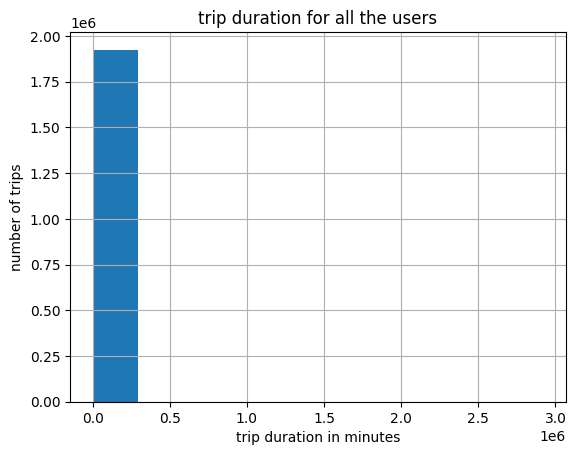

In [ ]:
ax = cbMay19.hist(column="tripduration")
plt.xlabel("trip duration in minutes")
plt.ylabel("number of trips")
plt.title ("trip duration for all the users");

**Fig:1 The histogram showing plotting of trip duration in minutes against the total number of trips. The histogram is highly skewed to the left means the dataset has large number of lowest trip durations**

**Now, Curing data by removing trip duration>1 day (86000 minutes)**

**Let, cbmay_clean be the name of dataframe after removing all the trip durations greater than 1 day/86000 minutes**

In [ ]:
cbMay19_clean = cbMay19[cbMay19["tripduration"]<86000]

In [ ]:
cbMay19_clean

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2
1924560,1926,2019-05-31 23:59:51.5060,2019-06-01 00:31:58.3920,146,Hudson St & Reade St,40.716250,-74.009106,422,W 59 St & 10 Ave,40.770513,-73.988038,33395,Subscriber,1985,1
1924561,2047,2019-05-31 23:59:52.4170,2019-06-01 00:34:00.1970,3658,W 18 St & 9 Ave,40.743534,-74.003676,2008,Little West St & 1 Pl,40.705693,-74.016777,27624,Subscriber,1987,0


Plotting the histogram of trip duration after removing duration time more than 1 day

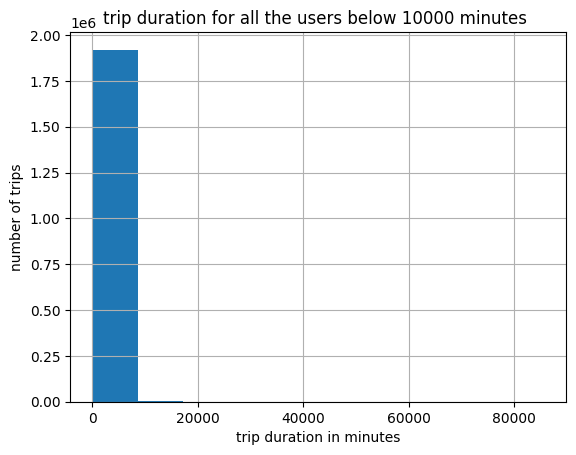

In [ ]:
ax = cbMay19_clean.hist(column="tripduration")
plt.xlabel("trip duration in minutes")
plt.ylabel("number of trips")
plt.title ("trip duration for all the users below 10000 minutes ");

**Figure 2:. Histogram of trip duration in minutes plotted against number of trips. The histogram is also skewed to the left but has most number of the lowest trips and few trips more than the lowest ones**

TARA - It would be 1440 minutes in one day.

# Data Wrangling



It is noticeable that the column gender is encoded as a binary -, 1 is for customers that identified as male, 2 for customers that identified as female. 0 is for non-binary and not registered genders.

Grouping the data based on gender

In [ ]:
grouped = cbMay19_clean.groupby('gender')

female_df = grouped.get_group(2)
male_df = grouped.get_group(1)
nonregistered_df=grouped.get_group(0)

**where female_df is female dataframe and male_df is male dataframe**

In [ ]:
female_df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
9,2733,2019-05-01 00:01:30.8120,2019-05-01 00:47:04.3080,3630,Frederick Douglass Blvd & W 115 St,40.803865,-73.955931,3628,Lenox Ave & W 117 St,40.802557,-73.949078,33792,Subscriber,1985,2
10,236,2019-05-01 00:01:36.4020,2019-05-01 00:05:33.1980,3232,Bond St & Fulton St,40.689622,-73.983043,3411,Bond St & Bergen St,40.684967,-73.986208,34411,Subscriber,1957,2
12,536,2019-05-01 00:01:44.6580,2019-05-01 00:10:41.3390,243,Fulton St & Rockwell Pl,40.688410,-73.979458,397,Fulton St & Clermont Ave,40.684157,-73.969223,30962,Subscriber,1974,2
20,290,2019-05-01 00:02:27.8000,2019-05-01 00:07:18.1110,346,Bank St & Hudson St,40.736529,-74.006180,168,W 18 St & 6 Ave,40.739713,-73.994564,30209,Subscriber,1984,2
22,553,2019-05-01 00:02:37.0480,2019-05-01 00:11:50.9870,448,W 37 St & 10 Ave,40.756604,-73.997901,485,W 37 St & 5 Ave,40.750380,-73.983390,21028,Subscriber,1989,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924554,699,2019-05-31 23:59:40.5130,2019-06-01 00:11:20.1020,368,Carmine St & 6 Ave,40.730386,-74.002150,470,W 20 St & 8 Ave,40.743453,-74.000040,16373,Subscriber,1976,2
1924556,432,2019-05-31 23:59:42.1250,2019-06-01 00:06:54.9420,358,Christopher St & Greenwich St,40.732916,-74.007114,405,Washington St & Gansevoort St,40.739323,-74.008119,34352,Customer,1985,2
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2


In [ ]:
female_df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,462473.000000,462473.000000,462473.000000,462473.000000,462473.000000,462473.000000,462473.000000,462473.000000,462473.000000,462473.0
mean,956.807262,1743.094706,40.734899,-73.981364,1734.082535,40.734701,-73.981762,26724.483315,1981.627455,2.0
std,1348.691094,1484.272955,0.032161,0.020057,1484.094015,0.031930,0.020117,6601.933352,11.957495,0.0
min,61.000000,72.000000,40.655400,-74.025353,72.000000,40.655400,-74.033552,14529.000000,1888.000000,2.0
25%,421.000000,380.000000,40.714979,-73.995299,379.000000,40.714948,-73.995960,19987.000000,1974.000000,2.0
50%,715.000000,523.000000,40.734011,-73.984267,522.000000,40.733812,-73.984844,28429.000000,1985.000000,2.0
75%,1226.000000,3318.000000,40.756604,-73.968896,3315.000000,40.755942,-73.969306,32527.000000,1991.000000,2.0
max,84967.000000,3790.000000,40.814394,-73.907744,3790.000000,40.814394,-73.907744,38002.000000,2003.000000,2.0


In [ ]:
male_df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1
5,1598,2019-05-01 00:00:47.5650,2019-05-01 00:27:26.4150,310,State St & Smith St,40.689269,-73.989129,3322,12 St & 4 Ave,40.668603,-73.990439,16614,Customer,1973,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924551,233,2019-05-31 23:59:28.4400,2019-06-01 00:03:21.5050,3232,Bond St & Fulton St,40.689622,-73.983043,3411,Bond St & Bergen St,40.684967,-73.986208,34972,Subscriber,1974,1
1924553,824,2019-05-31 23:59:29.8370,2019-06-01 00:13:13.8450,3117,Franklin St & Dupont St,40.735640,-73.958660,3093,N 6 St & Bedford Ave,40.717452,-73.958509,15228,Subscriber,1987,1
1924555,432,2019-05-31 23:59:41.6790,2019-06-01 00:06:54.2000,382,University Pl & E 14 St,40.734927,-73.992005,507,E 25 St & 2 Ave,40.739126,-73.979738,21562,Subscriber,1995,1
1924557,2819,2019-05-31 23:59:45.4930,2019-06-01 00:46:45.1570,436,Hancock St & Bedford Ave,40.682166,-73.953990,436,Hancock St & Bedford Ave,40.682166,-73.953990,26539,Customer,1993,1


In [ ]:
male_df.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.293509e+06,1.293509e+06,1.293509e+06,1.293509e+06,1.293509e+06,1.293509e+06,1.293509e+06,1.293509e+06,1.293509e+06,1293509.0
mean,8.050578e+02,1.625205e+03,4.073767e+01,-7.398254e+01,1.619006e+03,4.073744e+01,-7.398273e+01,2.740891e+04,1.980463e+03,1.0
std,1.121817e+03,1.467357e+03,2.960223e-02,1.937104e-02,1.467095e+03,2.949461e-02,1.945704e-02,6.285588e+03,1.205278e+01,0.0
min,6.100000e+01,7.200000e+01,4.065540e+01,-7.402535e+01,7.200000e+01,4.065540e+01,-7.404964e+01,1.452900e+04,1.885000e+03,1.0
25%,3.490000e+02,3.800000e+02,4.071882e+01,-7.399530e+01,3.790000e+02,4.071882e+01,-7.399596e+01,2.128600e+04,1.972000e+03,1.0
50%,5.870000e+02,5.080000e+02,4.073913e+01,-7.398584e+01,5.070000e+02,4.073902e+01,-7.398621e+01,2.903100e+04,1.983000e+03,1.0
75%,1.025000e+03,3.282000e+03,4.075715e+01,-7.397289e+01,3.282000e+03,4.075680e+01,-7.397344e+01,3.265000e+04,1.990000e+03,1.0
max,8.554300e+04,3.790000e+03,4.081439e+01,-7.390774e+01,3.790000e+03,4.081439e+01,-7.390774e+01,3.799800e+04,2.003000e+03,1.0


## plot the trip duration distributions for gender=2 and gender=1



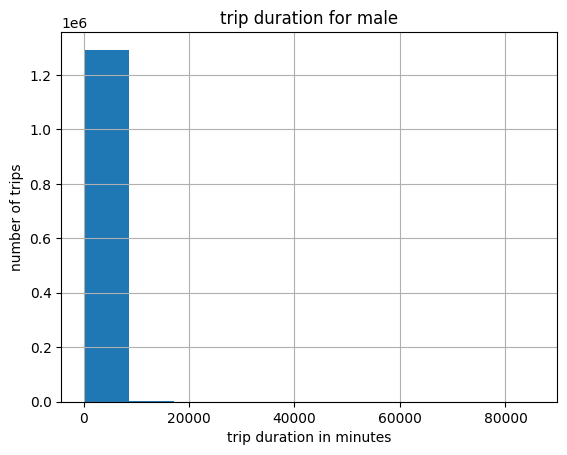

In [ ]:
ax = male_df.hist(column="tripduration")
plt.xlabel("trip duration in minutes")
plt.ylabel("number of trips")
plt.title ("trip duration for male");

**Fig:1 The histogram showing plotting of trip duration in minutes against the total number of trips from male_df dataframe. The histogram is skewed to the left and has the dataset that has large number of lowest trip durations and few trips greater than the lowest trips**

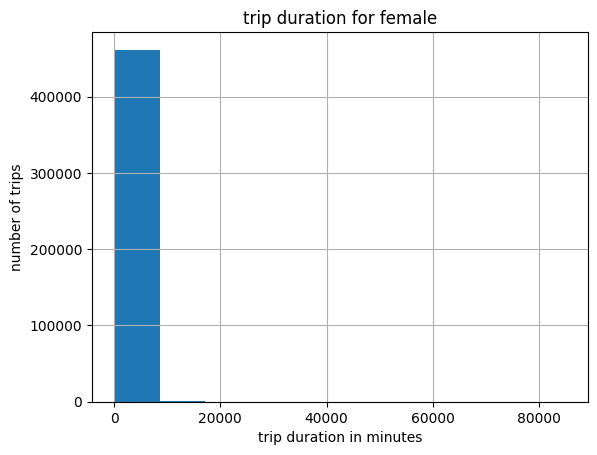

In [ ]:
ax = female_df.hist(column="tripduration")
plt.xlabel("trip duration in minutes")
plt.ylabel("number of trips")
plt.title ("trip duration for female");

**Fig:1 The histogram showing plotting of trip duration in minutes against the total number of trips from female_df dataframe. The histogram is skewed to the left and has the dataset that has large number of lowest trip durations and few trips greater than the lowest trips**

**The total trips in femal_df are ~ 400000 whereas the total trips in male_df are ~1200000. This is the reason why the height of histogram in two categories is different**

# Statistical analysis
Run two statistical tests: the t-test and the KS-test.




## **For t test**

**NULL HYPOTHESIS _H0_: The mean trip duration for both men and women is same.**




**ALTERNATIVE HYPOTHESIS _HA_:The mean trip duration for both men and women is not same.**



In [ ]:
stats.ttest_ind(male_df["tripduration"],female_df["tripduration"])

TtestResult(statistic=-74.69443820009117, pvalue=0.0, df=1755980.0)

**The extremely small value of P value (0) is less than the tabulated P value at 95% confidence interval. So the null hypothesis is rejected. There is significant difference between the means of male trip duaration and female trip duration**


# Are the sample coming from the same parent distribution

## **For KS test**





NULL and Alternative hypothesis:

**Null hypothesis, H0: The male and female samples are coming from same distribution**



**Alternate hypothesis, H1: The male and female samples are not coming from same distribution**

In [ ]:
stats.ks_2samp(male_df["tripduration"],female_df["tripduration"])

KstestResult(statistic=0.09812467384583817, pvalue=0.0, statistic_location=600, statistic_sign=1)

**The p value of 0 is lower than the tabulated P value at 95% CI. So, it rejects the null hypothesis and it means two samples are nowhere related to each other and doesn't come from population.**

In fact this test is very sensitive to differences in the mean of the sample. To use the test properly one should first normalize the data. That is: subtract the mean and divide by the standard deviation. This is how you would do it (my two clean samples for gender = 1 and gender = 2 are called cbMay19_m and cbMay19_f, yours will be possibly called differently)

**Now, normalizing the data**

Here normed_f and normed_m are normalized female and male dataframe from male_df and female_df dataframes.

In [ ]:
normed_f = (female_df["tripduration"] - female_df["tripduration"].mean()) / female_df["tripduration"].std()

In [ ]:
normed_f

9          1.316975
10        -0.534449
12        -0.312012
20        -0.494411
22        -0.299407
             ...   
1924554   -0.191154
1924556   -0.389123
1924558   -0.484030
1924559   -0.469201
1924562    0.005333
Name: tripduration, Length: 462473, dtype: float64

In [ ]:
normed_m = (male_df["tripduration"] - male_df["tripduration"].mean()) / male_df["tripduration"].std()

In [ ]:
normed_m

0         -0.593731
2          1.339739
3         -0.590166
4         -0.594623
5          0.706837
             ...   
1924551   -0.509939
1924553    0.016885
1924555   -0.332548
1924557    1.795250
1924560    0.999220
Name: tripduration, Length: 1293509, dtype: float64

**Rerunning the test after normalizing**

In [ ]:
stats.ks_2samp(["normed_m"],["normed_f"])

KstestResult(statistic=1.0, pvalue=1.0, statistic_location='normed_f', statistic_sign=-1)

**The conclusion definately changed after normalizing the samples. The P value of 1.0 is higher than the tabulated p value at 95% CI (0.05). This means null hypothesis can't be rejected and there is no significant difference betwen the datasets compared, both of them come from the same population**

# Extra Credit : do the same for week days only and weekends only

## **Separating dataframe cbmay19 into weekdays and weekends**

weekdays_df and weekend_df are weekdays and weekend dataframe respectively

In [ ]:
cbMay19_clean["starttime"]

0          2019-05-01 00:00:01.9010
1          2019-05-01 00:00:03.0210
2          2019-05-01 00:00:04.6270
3          2019-05-01 00:00:19.3340
4          2019-05-01 00:00:22.1840
                     ...           
1924558    2019-05-31 23:59:45.5760
1924559    2019-05-31 23:59:46.4650
1924560    2019-05-31 23:59:51.5060
1924561    2019-05-31 23:59:52.4170
1924562    2019-05-31 23:59:55.5500
Name: starttime, Length: 1923929, dtype: object

In [ ]:
cbMay19_clean["tripdate"] = pd.to_datetime(cbMay19_clean.starttime)
cbMay19_clean["tripdate"]

<ipython-input-140-073e4a941727>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cbMay19_clean["tripdate"] = pd.to_datetime(cbMay19_clean.starttime)


0         2019-05-01 00:00:01.901
1         2019-05-01 00:00:03.021
2         2019-05-01 00:00:04.627
3         2019-05-01 00:00:19.334
4         2019-05-01 00:00:22.184
                    ...          
1924558   2019-05-31 23:59:45.576
1924559   2019-05-31 23:59:46.465
1924560   2019-05-31 23:59:51.506
1924561   2019-05-31 23:59:52.417
1924562   2019-05-31 23:59:55.550
Name: tripdate, Length: 1923929, dtype: datetime64[ns]

In [ ]:
cbMay19_clean["tripdate"].dt.weekday < 5

0          True
1          True
2          True
3          True
4          True
           ... 
1924558    True
1924559    True
1924560    True
1924561    True
1924562    True
Name: tripdate, Length: 1923929, dtype: bool

In [ ]:
weekdays_df=cbMay19_clean[cbMay19_clean["tripdate"].dt.weekday < 5]

In [ ]:
weekdays_df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripdate
0,139,2019-05-01 00:00:01.9010,2019-05-01 00:02:21.5170,447,8 Ave & W 52 St,40.763707,-73.985162,423,W 54 St & 9 Ave,40.765849,-73.986905,31170,Subscriber,1983,1,2019-05-01 00:00:01.901
1,754,2019-05-01 00:00:03.0210,2019-05-01 00:12:37.6920,3258,W 27 St & 10 Ave,40.750182,-74.002184,3255,8 Ave & W 31 St,40.750585,-73.994685,25560,Customer,1969,0,2019-05-01 00:00:03.021
2,2308,2019-05-01 00:00:04.6270,2019-05-01 00:38:33.1710,3093,N 6 St & Bedford Ave,40.717452,-73.958509,3676,Van Brunt St & Van Dyke St,40.675833,-74.014726,33369,Subscriber,1978,1,2019-05-01 00:00:04.627
3,143,2019-05-01 00:00:19.3340,2019-05-01 00:02:42.5200,3486,Schermerhorn St & Bond St,40.688417,-73.984517,3412,Pacific St & Nevins St,40.685376,-73.983021,32041,Subscriber,1997,1,2019-05-01 00:00:19.334
4,138,2019-05-01 00:00:22.1840,2019-05-01 00:02:40.6480,388,W 26 St & 10 Ave,40.749718,-74.002950,494,W 26 St & 8 Ave,40.747348,-73.997236,35237,Subscriber,1967,1,2019-05-01 00:00:22.184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924558,304,2019-05-31 23:59:45.5760,2019-06-01 00:04:50.4620,3175,W 70 St & Amsterdam Ave,40.777480,-73.982886,423,W 54 St & 9 Ave,40.765849,-73.986905,32285,Subscriber,1987,2,2019-05-31 23:59:45.576
1924559,324,2019-05-31 23:59:46.4650,2019-06-01 00:05:11.1630,2003,1 Ave & E 18 St,40.733812,-73.980544,536,1 Ave & E 30 St,40.741444,-73.975361,33874,Subscriber,1994,2,2019-05-31 23:59:46.465
1924560,1926,2019-05-31 23:59:51.5060,2019-06-01 00:31:58.3920,146,Hudson St & Reade St,40.716250,-74.009106,422,W 59 St & 10 Ave,40.770513,-73.988038,33395,Subscriber,1985,1,2019-05-31 23:59:51.506
1924561,2047,2019-05-31 23:59:52.4170,2019-06-01 00:34:00.1970,3658,W 18 St & 9 Ave,40.743534,-74.003676,2008,Little West St & 1 Pl,40.705693,-74.016777,27624,Subscriber,1987,0,2019-05-31 23:59:52.417


In [ ]:
weekend_df=cbMay19_clean[cbMay19_clean["tripdate"].dt.weekday >= 5]

In [ ]:
weekend_df

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,tripdate
192003,426,2019-05-04 00:00:07.3100,2019-05-04 00:07:13.9450,3118,McGuinness Blvd & Eagle St,40.735550,-73.952840,3668,Leonard St & Nassau Ave,40.723957,-73.949844,17924,Subscriber,1980,1,2019-05-04 00:00:07.310
192004,778,2019-05-04 00:00:10.8690,2019-05-04 00:13:09.1860,3656,E 2 St & Avenue A,40.723077,-73.985836,2012,E 27 St & 1 Ave,40.739445,-73.976806,31269,Subscriber,1996,2,2019-05-04 00:00:10.869
192005,451,2019-05-04 00:00:15.6220,2019-05-04 00:07:47.0350,3087,Metropolitan Ave & Meeker Ave,40.714133,-73.952344,3083,Bushwick Ave & Powers St,40.712477,-73.941000,29921,Subscriber,1993,2,2019-05-04 00:00:15.622
192006,196,2019-05-04 00:00:20.7160,2019-05-04 00:03:37.0950,328,Watts St & Greenwich St,40.724055,-74.009660,257,Lispenard St & Broadway,40.719392,-74.002472,24996,Subscriber,1968,1,2019-05-04 00:00:20.716
192007,370,2019-05-04 00:00:21.0860,2019-05-04 00:06:31.8570,2003,1 Ave & E 18 St,40.733812,-73.980544,445,E 10 St & Avenue A,40.727408,-73.981420,30508,Subscriber,1994,1,2019-05-04 00:00:21.086
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1607614,596,2019-05-26 23:59:44.4710,2019-05-27 00:09:41.3350,529,W 42 St & 8 Ave,40.757570,-73.990985,456,E 53 St & Madison Ave,40.759711,-73.974023,31658,Subscriber,1981,1,2019-05-26 23:59:44.471
1607615,115,2019-05-26 23:59:47.0730,2019-05-27 00:01:42.6020,3062,Myrtle Ave & Marcy Ave,40.695398,-73.949549,3062,Myrtle Ave & Marcy Ave,40.695398,-73.949549,24936,Customer,1969,0,2019-05-26 23:59:47.073
1607616,577,2019-05-26 23:59:48.0450,2019-05-27 00:09:25.2180,3078,Broadway & Roebling St,40.709248,-73.960631,3092,Berry St & N 8 St,40.719009,-73.958525,16657,Customer,1969,0,2019-05-26 23:59:48.045
1607617,628,2019-05-26 23:59:52.3010,2019-05-27 00:10:20.9620,3142,1 Ave & E 62 St,40.761227,-73.960940,499,Broadway & W 60 St,40.769155,-73.981918,14790,Subscriber,1988,1,2019-05-26 23:59:52.301


# Hypothesis testing



# **For t test**

**For weekdays:**

**NULL HYPOTHESIS _H0_: The mean trip duration during weekdays for both men and women is same.**

**ALTERNATIVE HYPOTHESIS _HA_:The mean trip duration during weekdays for both men and women is not same.**






In [ ]:
grouped_weekdays = weekdays_df.groupby('gender')
female_weekdays = grouped_weekdays.get_group(2)
male_weekdays = grouped_weekdays.get_group(1)
nonregistered_weekdays=grouped_weekdays.get_group(0)

In [ ]:
female_weekdays.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,359536.000000,359536.000000,359536.000000,359536.000000,359536.000000,359536.000000,359536.000000,359536.000000,359536.000000,359536.0
mean,913.068783,1707.863797,40.735200,-73.981723,1697.215097,40.735091,-73.982093,26681.326952,1981.302529,2.0
std,1236.902796,1481.485155,0.031624,0.019779,1480.888906,0.031386,0.019867,6616.042516,12.019143,0.0
min,61.000000,72.000000,40.655400,-74.025353,72.000000,40.655400,-74.025353,14529.000000,1888.000000,2.0
25%,411.000000,379.000000,40.715348,-73.995299,376.000000,40.715348,-73.995960,19922.000000,1973.000000,2.0
50%,690.000000,518.000000,40.734546,-73.984706,517.000000,40.734546,-73.985180,28381.000000,1985.000000,2.0
75%,1167.000000,3311.000000,40.755942,-73.970314,3308.000000,40.755273,-73.970416,32521.000000,1991.000000,2.0
max,84967.000000,3790.000000,40.814394,-73.907744,3790.000000,40.814394,-73.907744,37889.000000,2003.000000,2.0


In [ ]:
male_weekdays.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,1.054486e+06,1.054486e+06,1.054486e+06,1.054486e+06,1.054486e+06,1.054486e+06,1.054486e+06,1.054486e+06,1.054486e+06,1054486.0
mean,7.786068e+02,1.596013e+03,4.073807e+01,-7.398289e+01,1.589432e+03,4.073790e+01,-7.398305e+01,2.738052e+04,1.980122e+03,1.0
std,1.072976e+03,1.461760e+03,2.903127e-02,1.907075e-02,1.461286e+03,2.892786e-02,1.917424e-02,6.289842e+03,1.205601e+01,0.0
min,6.100000e+01,7.200000e+01,4.065540e+01,-7.402535e+01,7.200000e+01,4.065540e+01,-7.403891e+01,1.452900e+04,1.885000e+03,1.0
25%,3.450000e+02,3.800000e+02,4.071912e+01,-7.399530e+01,3.790000e+02,4.071911e+01,-7.399596e+01,2.125700e+04,1.972000e+03,1.0
50%,5.730000e+02,5.040000e+02,4.073971e+01,-7.398602e+01,5.040000e+02,4.073945e+01,-7.398658e+01,2.899400e+04,1.983000e+03,1.0
75%,9.870000e+02,3.260000e+03,4.075680e+01,-7.397371e+01,3.260000e+03,4.075660e+01,-7.397375e+01,3.263600e+04,1.990000e+03,1.0
max,8.554300e+04,3.790000e+03,4.081439e+01,-7.390774e+01,3.790000e+03,4.081439e+01,-7.390774e+01,3.799800e+04,2.003000e+03,1.0


In [ ]:
stats.ttest_ind(male_weekdays["tripduration"],female_weekdays["tripduration"])

TtestResult(statistic=-62.33514412813701, pvalue=0.0, df=1414020.0)

**The extremely small value of P value (0) is less than the tabulated P value at 95% confidence interval. So the null hypothesis is rejected. There is significant difference between the means of male trip duaration and female trip duration**


**For weekends:**

**NULL HYPOTHESIS _H0_: The mean trip duration during weekends for both men and women is same.**

**ALTERNATIVE HYPOTHESIS _HA_:The mean trip duration during weekends for both men and women is not same.**


In [ ]:
grouped_weekend = weekend_df.groupby('gender')

female_weekend = grouped_weekend.get_group(2)
male_weekend = grouped_weekend.get_group(1)
nonregistered_weekend=grouped_weekend.get_group(0)

In [ ]:
female_weekend.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,102937.000000,102937.000000,102937.000000,102937.000000,102937.000000,102937.000000,102937.000000,102937.000000,102937.000000,102937.0
mean,1109.576022,1866.148421,40.733847,-73.980111,1862.852279,40.733342,-73.980605,26875.218872,1982.762350,2.0
std,1672.878112,1487.443507,0.033950,0.020951,1488.092602,0.033725,0.020926,6550.216190,11.668911,0.0
min,61.000000,72.000000,40.655400,-74.025353,72.000000,40.655400,-74.033552,14529.000000,1889.000000,2.0
25%,464.000000,391.000000,40.712733,-73.995101,390.000000,40.712690,-73.995960,20158.000000,1976.000000,2.0
50%,825.000000,2006.000000,40.731724,-73.982666,2003.000000,40.730477,-73.983299,28611.000000,1987.000000,2.0
75%,1432.000000,3341.000000,40.759923,-73.965369,3346.000000,40.757973,-73.965903,32558.000000,1991.000000,2.0
max,83738.000000,3790.000000,40.814394,-73.907744,3790.000000,40.814394,-73.907744,38002.000000,2003.000000,2.0


In [ ]:
male_weekend.describe()

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,239023.000000,239023.000000,239023.000000,239023.000000,239023.000000,239023.000000,239023.000000,239023.000000,239023.000000,239023.0
mean,921.750367,1753.991758,40.735877,-73.980976,1749.475477,40.735400,-73.981332,27534.163332,1981.966974,1.0
std,1309.460269,1484.962803,0.031938,0.020571,1485.445714,0.031795,0.020600,6265.264291,11.922812,0.0
min,61.000000,72.000000,40.655400,-74.025353,72.000000,40.655400,-74.049638,14529.000000,1885.000000,1.0
25%,371.000000,383.000000,40.715595,-73.995209,382.000000,40.715348,-73.995960,21471.000000,1975.000000,1.0
50%,659.000000,525.000000,40.734546,-73.984327,525.000000,40.734232,-73.984907,29337.000000,1985.000000,1.0
75%,1205.000000,3315.000000,40.759125,-73.968044,3318.000000,40.757632,-73.968415,32726.000000,1991.000000,1.0
max,84630.000000,3790.000000,40.814394,-73.907744,3790.000000,40.814394,-73.907744,37889.000000,2003.000000,1.0


In [ ]:
stats.ttest_ind(male_weekend["tripduration"],female_weekend["tripduration"])

TtestResult(statistic=-35.266111112160296, pvalue=6.014920385717929e-272, df=341958.0)

**As the calculated p value is lower than the tabulated p value, the null hypothesis is rejected. There is significant difference between mean of two data sets**

## **for KS test**


**Setting hypothesis for weekdays**



**Null hypothesis, H0: The male and female samples from weekdays are coming from same distribution**

**Alternate hypothesis, H1: The male and female samples from weekdays are not coming from same distribution**


First, normalized tripdurations are calculated from female_weekdays and male_weekdays dataframe

In [ ]:
normed_fweekdays = (female_weekdays["tripduration"] - female_weekdays["tripduration"].mean()) / female_weekdays["tripduration"].std()

In [ ]:
normed_mweekdays = (male_weekdays["tripduration"] - male_weekdays["tripduration"].mean()) / male_weekdays["tripduration"].std()

In [ ]:
stats.ks_2samp(normed_mweekdays,normed_fweekdays)

KstestResult(statistic=0.011627446754563509, pvalue=6.475030557435115e-32, statistic_location=-0.1254518312240572, statistic_sign=1)

**As the calculated p value is lower than the tabulated p value, the null hypothesis can be rejected. This means these two data sets doesn't come from same population**

**Setting hypothesis for weekends**

**Null hypothesis, H0: The male and female samples from weekends are coming from same distribution**

**Alternate hypothesis, H1: The male and female samples from weekends are not coming from same distribution**


First, normalized tripdurations are calculated from female_weekend and male_weekend dataframe

In [ ]:
normed_fweekend = (female_weekend["tripduration"] - female_weekend["tripduration"].mean()) / female_weekend["tripduration"].std()

In [ ]:
normed_mweekend = (male_weekend["tripduration"] - male_weekend["tripduration"].mean()) / male_weekend["tripduration"].std()

In [ ]:
stats.ks_2samp(normed_mweekend,normed_fweekend)

KstestResult(statistic=0.051264448535776413, pvalue=8.88832517886236e-165, statistic_location=-0.4702321877151429, statistic_sign=1)

**As the calculated p value is lower than the tabulated p value, the null hypothesis is rejected. This means these two data sets don't come from same population**

TARA - Good work overall. There was a mistake with excluding the trip durations for one day, but your analysis on null hypothesis was correct